## Libraries

In [3]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle
# We import the Logistic Regression module from sk learn for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
#We import the necessary libraries for visualization. We set seaborn do be our default.
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
# We import the Linear Regression module from sk learn for the quantity model.
from sklearn.linear_model import LinearRegression

## Data Preparation

In [4]:
#load data
df_purchase = pd.read_csv('Dataset/purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model
* Will a customer buy a product from a particular product categoty when they enter the shop?
* In this section, we'll arrive at the answer using a statistical model that estimates purchase probability for each customer at each shopping trip. Then, we'll calculate price elasticity of purchase probability under different conditions.

In [5]:
# In order to predict we need input and output variables. 
# Our Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']

* Puchase Probability is influenced by price. We want to know whether a purchase has happened based on the average price of the product. Though there are different brands of candy bars, we are only interested in whether a purchase will occur at all.

In [6]:
# Our dependant variable is based on the average price of chocolate candy bars. 
# Therefore, X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [7]:
# We create a Logistic Regression model using sk learn. Then we fit the model with our X or price and our Y or incidence.
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [8]:
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34833669]])

* A decrease inprice would lead to an increase in purchase probability. This  is direction, now we'll estimate the magnitude of relationship.

## Price Elasticity of Purchase Probability
* Price Elasticity of Purchase Probability is the % change in purchase probability in response to a % change in price.

In [9]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [10]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [11]:
df_price_range = pd.DataFrame(price_range)

In [12]:
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [13]:
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics part of the course.
df_price_elasticities = pd.DataFrame(price_range)

In [14]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096463
1,0.51,-0.100534
2,0.52,-0.104732
3,0.53,-0.109060
4,0.54,-0.113522
...,...,...
295,3.45,-8.013986
296,3.46,-8.039237
297,3.47,-8.064453
298,3.48,-8.089635


In [15]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096463
1,0.51,-0.100534
2,0.52,-0.104732
3,0.53,-0.109060
4,0.54,-0.113522
5,0.55,-0.118120
6,0.56,-0.122858
7,0.57,-0.127740
8,0.58,-0.132769
9,0.59,-0.137947


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

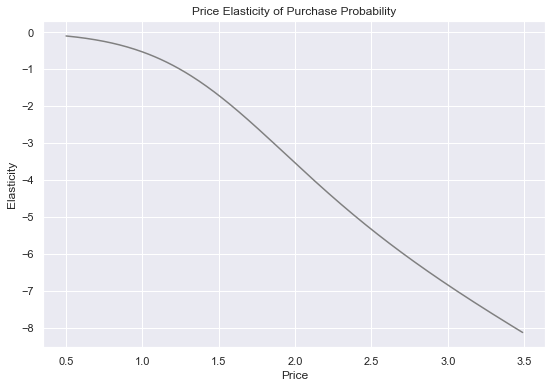

In [16]:
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

* This is the Entire Price Elasticity curve and how it changes compared to the price range. As a function, the price elasticity decreases as price increases - the higher the price of a product becomes, the less likely it will be for people to want to buy it. At what rate this happens? The decrease in price is slow in the range between 0.5 and 1.1 and then becomes steeper after 1.1. The other important observation we make is that the price elasticities are all negative. To calculate them we used the model's price coefficient which is negative 2.35, thus indicating the inverse proportionality between price and purchase probability. 
* By definition, elasticity measures the percent change in an output variable, in our case purchase probability, given a percent change in an input variable, or in our case price. Now, if this percent change is >100% we can say that the output or purchase probability is called Elastic. On the other hand, for changes is <100% it is Inelastic. In other words, if the elasticity has a value smaller than 1 in absolute terms, we say it is Inelastic. If it is greater than 1 we say it is Elastic. 
* Let's look at an elasticity smaller than 1. At 1.10 price the average customer has an elasticity of -0.69. This means that for each increse in price by 1%, the probability of purchase will change by -0.69%. Therefore, we expect it to decrease by 0.69%. The important observation here is that an increase of 1% in elasticity leads to a decrease of < 1%. Therefore, purchase probability at this point is Inelastic. Let's examine another elasticity, this time at a higher price point. If we look at the 1.50 price, the elasticity is -1.7. It's a different story. Here an increase of 1% in price would translate into a decline of -1.7 % of purchase probability. Therefore, an increase of 1% will lead to a decrease of almost 2% in purchase probability. In this case, the elasticity of purchase probability is Elastic. This is an important distinction. And the reason is that for Inelastic values the general recommendation is to increase the price, as it wouldn't cause a significant decrease in the purchase probability. On the other hand, if we have elasticity, which is > 1 in absolute terms, we should decrease our prices.
* Now we can find the price elasticities which are elastic and which are inelastic. The elasticity is steadily decreasing, therefore, in our graph, it starts from being inelastis and then switches to being elastic. We observe this happens at the 1.25 mark.
* Conclusion: With prices < 1.25, we can increase our product price without losing too much in terms of purchase probability. For prices > 1.25, we have more to gain by reducing our prices.

## Purchase Probability by Segments

### $\color{green}{\text{Segment 0 - Standard}}$

In [30]:
# Select only customers from segment 0, the standard segment.
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### $\color{green}{\text{Segment 1 - Career-Focused}}$

In [17]:
# We filter the data to contain only customers from segment 1, the career-focused.
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [18]:
# Again we want to predict the purchase probability, so our Y variable is the incidence column.
# Only here we select only the customers from the first segment.
Y = df_pa_segment_1['Incidence']

In [19]:
X = pd.DataFrame()

In [20]:
# We calculate the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [21]:
# Fit logistic regression model
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [22]:
# We observe that the price coefficient for the career focused is -1.7, whereas for the average customer it was -2.35.
# This is an indicator, that this segment is less price sensitive compared to the average customer.
model_incidence_segment_1.coef_

array([[-1.71193277]])

* The coefficient is -1.71, so it is lower in absolute terms compared to the average consumers' coefficient. Therefore, it will have a lower impact, when we calculate the elasticities. Could this mean that this segment will be less elastic than our average customer? Well, there is only one way to find out - calculate the elasticities.

In [23]:
# Calculate Price Elasticity of the career-focused segment.
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Results

In [24]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

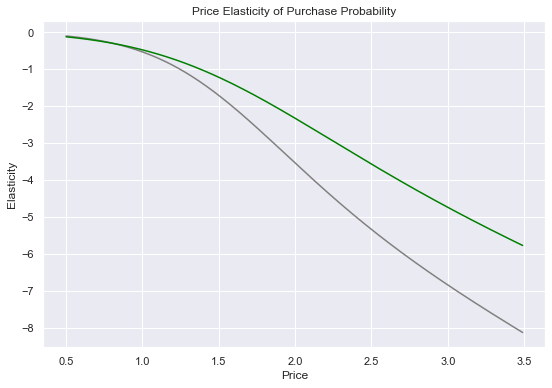

In [25]:
# We plot the elasticities of the average customer and the career-focused segment side by side. 
# The career-focused segment is displayed in green. The same color we used during the descriptive analysis.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

* The two elasticity lines  lie very close together in the 0.5 and 1.0 range. From there on, the green curve sits above the grey one. As we suspected, the purchase probabilities of the career focused segment are less elastic than average. In fact, we can observe at which point they become inelastic, if we refer to our table again. A dollar 39 cents. That's 14 cents higher than he average turning point. In this case, we'd increase prices if we were in the 0.5 and 1.39 range and think about decreasing them afterwards, if we want to target the purchase probability of the career focused segment.

### $\color{green}{\text{Segment 2 - Fewer-Opportunities}}$

In [26]:
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [27]:
# Logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Results

In [28]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

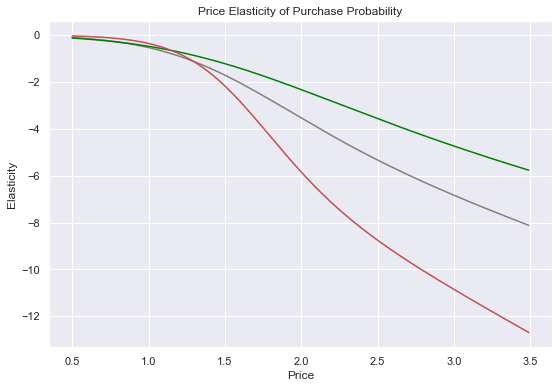

In [29]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

* We can see that this segment is quite different when compared to the other two. We can observe that the fewer opportunities segment is more price-sensitive compared to the average and a lot more sensitive compared to the career focused segment. The line is not only lower than the other two, but it is also much steeper. And this means that with an increase in price, they become more and more elastic much faster.
* Lastly, let's see the tipping point between elasticity and inelasticity for the fewer opportunities segment. It seems to stand at 1.27 cents. This is extremely interesting because the average tipping point was at 1.25. It seems that this segment is more inelastic at lower prices. This is also evident from graph - the red line is a bit higher than the other two in the beginning. Later on, however, it becomes much steeper, so let's elaborate a bit on that. Now, this may be due to two main reasons. The first one is technical - since the fewer opportunities cluster is the biggest one, maybe the abundance of data is resulting in a more sophisticated model. The second one is related to purchase behavior. Maybe the fewer opportunities cluster enjoys chocolate candy bars so much, that a price increase in the lower price ranges won't stop them from buying it. However, once it starts becoming expensive - it doesn't make any financial sense to them to invest in it. 

### $\color{green}{\text{Segment 3 - Well-Off}}$

In [31]:
# Select only customers from segment 3 
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]
# Prepare dependant and independant variables.
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5
# Logistic regression model
model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954
5,0.55,-0.118120,-0.245119,-0.140923,-0.040614,-0.193160
6,0.56,-0.122858,-0.252237,-0.145586,-0.042853,-0.198438
7,0.57,-0.127740,-0.259466,-0.150351,-0.045200,-0.203789
8,0.58,-0.132769,-0.266807,-0.155217,-0.047660,-0.209213
9,0.59,-0.137947,-0.274261,-0.160187,-0.050236,-0.214711


### ${\textbf{Results}}$

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

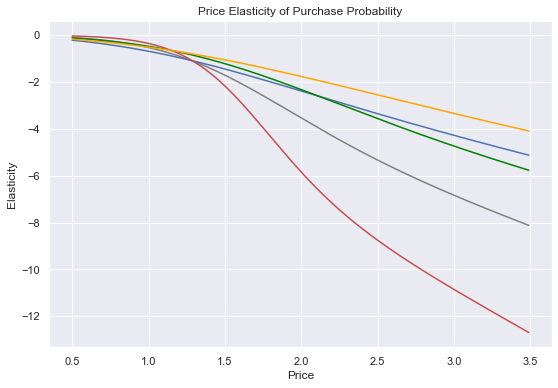

In [32]:
# We display all elasticities of purchase probability on the same plot. 
# We observe that the Career-focused segment are the least elastic when compared to the rest. 
# So, their purchase probability elasticity is not as affected by price.
# The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that
# the standard segment is least homogenous, which we discovered during our descriptive analysis. 
# It may be that the customers in this segment have different shopping habbits, which is why their 
# customers start with being more elastic than average but then shift to being more inelastic than the average customer
# and indeed the Career-focused segment.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature
* In any purchase analytics model, price will be the most promineent feature. However there might be other factors, which affect a customers' decision whether to buy a product, as well. You may remember from our introductory lectures that one of the 4Ps was Promotion. This basically means that the product's price could be temporarily reduced, or other ypes of promotions, such as display, or feature may come into play. So, Product promotion may affect purchase probability.

### Data Preparation

In [33]:
Y = df_pa['Incidence']

In [34]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [35]:
# We include a second promotion feature. We'd like to examine the effects of promotions on purchase probability.
# We calculate the average promotion rate across the five brands. We add the mean price for the brands.
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [36]:
# The coefficient for promotion is positive. 
# Therefore, there is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.4939369 ,  0.56144681]])

* Increse in promotion increases the purchase probability.

## Price Elasticity with Promotion

In [37]:
# We create a data frame on which our model will predict. We need to include A price and promotion feature.
# First, we'll include the price range as the price feature. Next, we'll include the promotion feature.
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [38]:
# We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1

In [39]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [40]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [41]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844,-0.125732
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766,-0.129848
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757,-0.134043
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820,-0.138318
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954,-0.142674
5,0.55,-0.118120,-0.245119,-0.140923,-0.040614,-0.193160,-0.147112
6,0.56,-0.122858,-0.252237,-0.145586,-0.042853,-0.198438,-0.151632
7,0.57,-0.127740,-0.259466,-0.150351,-0.045200,-0.203789,-0.156237
8,0.58,-0.132769,-0.266807,-0.155217,-0.047660,-0.209213,-0.160926
9,0.59,-0.137947,-0.274261,-0.160187,-0.050236,-0.214711,-0.165702


## Price Elasticity without Promotion

In [42]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [43]:
# Promotion feature -No Promotion.
# We assume there aren't any promotional activities on any of the price points.
# We examine the elasticity of purchase probability when there isn't promotion.
df_price_elasticity_promotion_no['Promotion'] = 0

In [44]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [45]:
no_promo = Y_no_promo[: , 1]

In [46]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [47]:
# Update master data frame to include purchase probability elasticities without promotion.
# We can now see the values with and without promotion and compare them for each price point in our price range.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

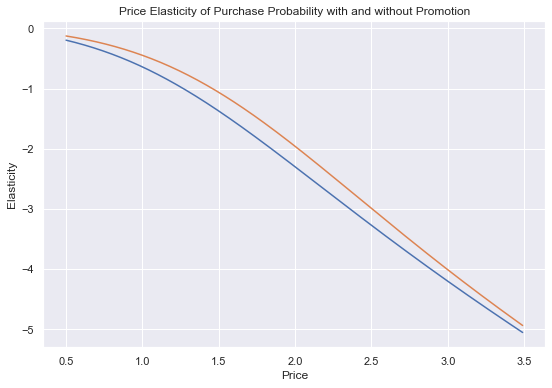

In [48]:
# Plot purchase elasticities with and without promotion side by side for comprarisson.
# Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.
# This is an important insight for marketers, as according to our model people are more likely to buy a product if there is
# some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

* Let me just emphasize that these two lines represent the elasticity of purchase probability given maximum and minimum promotional activity. This graph here tells us that the elasticity curve with promotion sits above its respective no-promotion counterpart for the entire price range. 
* Additionally, if we consult our master dataframe we can see thet inelasticity for no promotion ends at 1.27, while for promotion at 1.46. That's a difference of almost 20 cents, so if a product has regular price of 1.30 dollars, the purchase probability is elastic. However, what if a product costs 1.50 dollars on the regular and it's price is reduced to the aforementioned 1.30 dollars during a promotion? Then our analysis says that purchase probability is still inelastic at this point. This may sount trivial, but it is not. People are more willing to buy products at promotional prices. Be it because of the large discounts signs in some stores, or just because psychologically people feel they're getting a bargain. In any case, customers are less price sensitive to similar price changes when there are promotion activities. In other words, it pays off to offer discounts. According to this model, if we could incorporate it, it would be more beneficial to have a higher original price and constant promotion, rather than a lower original price.

## ${\textbf{Brand Choice}}$
    Which brand is the customer going to choose?
    What is the probability to choose certain brand?
    It would help marketers analyze their customers behavior. Based on that they can boost sales. But at the same time, the goal would be to increase customer satisfaction, thus helping both the company and the customer.
    This time we'll use multinomial logistic regression, as we have 5 brands or classes

### Data Preparation

In [49]:
# Here we are interested in determining the brand choice of the customer. 
# Hence, we filter our data, to include only purchase occasion, when a purchase has occured. 
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [50]:
# We cap the maximum displayed rows in a table, to make computation more efficient and easier readability.
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [51]:
# Our model will predict the brand.
Y = brand_choice['Brand']

In [52]:
# Here we decide which features to include for prediction.
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [53]:
# We predict based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [54]:
# Brand Choice Model fit.
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [55]:
# Here are the coeffictients for the model. We have five brands and five features for the price. 
# Therefore, this output is somewhat difficult to read.
model_brand_choice.coef_

array([[-3.91594937,  0.65846394,  2.41775747,  0.70409422, -0.20209447],
       [ 1.27461798, -1.87985257, -0.21261741, -0.20633514,  0.58787911],
       [ 1.62416125,  0.56209562,  0.50075772,  1.03948048,  0.45274561],
       [ 0.57454452,  0.39559153, -1.40057343, -1.24623757,  0.24936112],
       [ 0.44262562,  0.26370148, -1.30532435, -0.29100199, -1.08789137]])

In [56]:
# We create a pandas data frame, which contains to coefficients.
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915949,0.658464,2.417757,0.704094,-0.202094
1,1.274618,-1.879853,-0.212617,-0.206335,0.587879
2,1.624161,0.562096,0.500758,1.039480,0.452746
3,0.574545,0.395592,-1.400573,-1.246238,0.249361
4,0.442626,0.263701,-1.305324,-0.291002,-1.087891


In [57]:
# We make some transformations on the coefficients data frame to increase readability.
# We transpose the data frame, to keep with the conventional representation of results.
# We add labels for the columns and the index, which represent the coefficients of the brands and prices, respectively. 
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


* Let's start with brand 1. The coefficient of the own brand with respect to price is negative, while it's positive for all other prices except 5. We already know that the higher the price of our own product, the lower the probability for it to be purchased. So it makes sense for the own brand price coeficient to be negative. On the other hand, the more the price of a competitor increases, the higher the probability of customers switching to our own brand would be. Hence, there is a positive between our own brands purchase probability and a competitive brand increasing their price. At this point, you may have realized that the choice probability for anyone brand and the choice probabilities for all the other brands are interrelated and a marketing mixed tool of our brand reflects not only the choice probability for that brand, but the choice probabilities for all other brands as well. These effects are known as Own Brand Effects and Cross Brand Effects.

## Own Price Elasticity Brand 5
    Imagine you are a marketing analyst working for brand 5, first you would like to know the effects of price changes to your own brand price, then you'd like to know what would happen if your competitors change their pricing. 

In [58]:
# We want to calculate price elasticity of brand choice.
# Here we create a data frame with price columns, which our model will use to predict the brand choice probabilities.
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [59]:
# Brand Choice Model prediction.
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [60]:
# Our model returns the probabilities of choosing each of the 5 brands. 
# Since, we are interested in the probability for the fifth brand we need to obtain the last column located on position 4,
# as we're starting to count from 0.
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [61]:
# We're interested in choosing brand 5. 
# Therefore, the beta coefficient we require is that of the brand 5 coefficient and price 5.
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [62]:
# Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [63]:
# Adding the price elasticities to our master data frame. 
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844,-0.125732,-0.195632,-0.049055
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766,-0.129848,-0.201753,-0.050616
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757,-0.134043,-0.207976,-0.052207
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820,-0.138318,-0.214303,-0.053827
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954,-0.142674,-0.220733,-0.055477
5,0.55,-0.118120,-0.245119,-0.140923,-0.040614,-0.193160,-0.147112,-0.227269,-0.057158
6,0.56,-0.122858,-0.252237,-0.145586,-0.042853,-0.198438,-0.151632,-0.233910,-0.058871
7,0.57,-0.127740,-0.259466,-0.150351,-0.045200,-0.203789,-0.156237,-0.240658,-0.060615
8,0.58,-0.132769,-0.266807,-0.155217,-0.047660,-0.209213,-0.160926,-0.247513,-0.062391
9,0.59,-0.137947,-0.274261,-0.160187,-0.050236,-0.214711,-0.165702,-0.254476,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

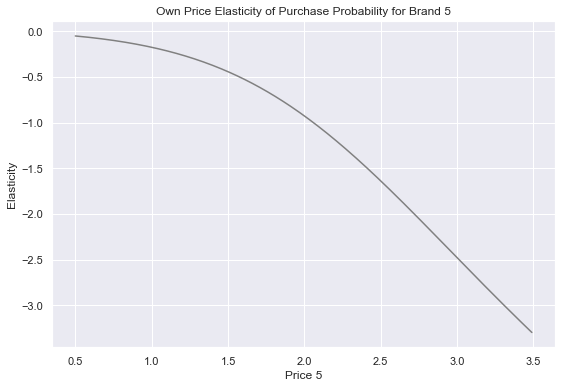

In [64]:
# Plot elasticities of purchase probability for brand 5.
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

## Cross Price Elasticity Brand 5, Cross Brand 4

In [65]:
# We want to examine the effect of the changes in price of a competitor brand.
# As we've discussed in the lecture, the brand which comes closest to our own brand is brand 4. 
# Therefore, we need to examine changes in the price of this brand.
# Keep in mind, we could examine the cross price elasticities for any of the remaining brands, 
# we just need to update this data frame accordingly to contain the respective brand.
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [66]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [67]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [68]:
# As now we're interested in what the probability of choosing the competitor brand is, 
# we need to select the purchase probability for brand 4, contained in the 4th column with index 3. 
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [69]:
beta5

-1.09

In [70]:
# In order to calculate the cross brand price elasticity, we need to use the new formula we introduced in the lecture.
# The elasticity is equal to negative the price coefficient of the own brand multiplied by the price of the cross brand,
# further multiplied by the probability for choosing the cross brand.
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [71]:
# Update price elasticities data frame to include the cross price elasticities for brand 5 with respect to brand 4.
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844,-0.125732,-0.195632,-0.049055,0.332011
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766,-0.129848,-0.201753,-0.050616,0.337287
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757,-0.134043,-0.207976,-0.052207,0.342506
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820,-0.138318,-0.214303,-0.053827,0.347668
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954,-0.142674,-0.220733,-0.055477,0.352773
5,0.55,-0.118120,-0.245119,-0.140923,-0.040614,-0.193160,-0.147112,-0.227269,-0.057158,0.357820
6,0.56,-0.122858,-0.252237,-0.145586,-0.042853,-0.198438,-0.151632,-0.233910,-0.058871,0.362809
7,0.57,-0.127740,-0.259466,-0.150351,-0.045200,-0.203789,-0.156237,-0.240658,-0.060615,0.367740
8,0.58,-0.132769,-0.266807,-0.155217,-0.047660,-0.209213,-0.160926,-0.247513,-0.062391,0.372614
9,0.59,-0.137947,-0.274261,-0.160187,-0.050236,-0.214711,-0.165702,-0.254476,-0.064200,0.377429


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

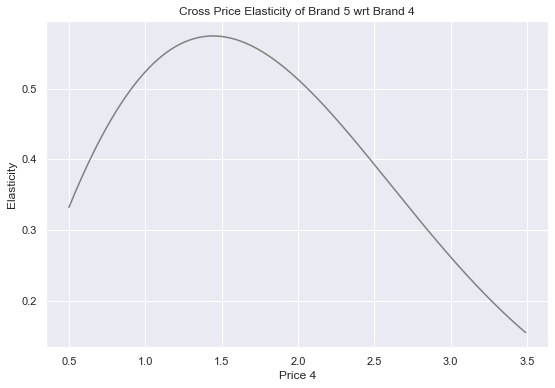

In [72]:
# Here we examine the cross price elasticity of purchase probability for brand 5 with respect to brand 4.
# We observe they are positive. As the price of the competitor brand increases, 
# so does the probability for purchasing our own brand.
# Even though the elasticity starts to decrease from the 1.45 mark, it is still positive, 
# signalling that the increase in purchase probability for the own brand happens more slowly.
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

* We have successfully obtained the cross price elasticities for the competitor brand 4. We observe that the elasticities are positive across the price range. This indicates that if compititor brand 4 increases price, the purchase probability for our own brand would increase. Our compititors raise prices, customers start buying our product more. 
* Once again though, the elasticities show us exactly how much more, depending on the cross price elasticities, we can actually gain insights about the market itself.
* Now, if the cross price elasticity is > 0, the two products are considered substitutes. That's logical as brand4 and brand 5 are both chocolate candy bars. If, however, we are looking at brand 5 cross some type of beer, for instance, the cross price elasticity would not be necessarily positive as the two products have nothing in common.
* Okay, inour example, all cross price elasticities will be positive as all brands are substitutes for one another. Further more, if the cross price elasticity at some price point is greater in absolute terms than our own price elasticity, the alternative brand is considered a strong substitute.
* So, is brand 4 a strong substitute for brand 5? Well, it depends on price point. You can graph the absolute values of the two elasticities, or examine the elasticities table instead. Foe this case, brand 4 is a strong substitute for brand 5 for all prices upto 1.65. However, we know that these prices are out of the natural domain of brand 4. Therefore, if brand 4 had a substatially lower price, it would be a very strong competitor of brand 5. It is important to mark that the observed price range of brand 5 lies between 1.76 and 2.26. In this region, we observe the elasticity is steadily decresasing. This signals that with an increase in price, the purchase probability changes more slowly. Note however, it is positive. Therefore, our purchase probability still increases with the increase in price of brand 4, but at a slower rate.
* We can conclude that when it comes to the average customer, brand 4 is an albiet weak substitute for brand 5. In light of these results, Brand 5 can crate a marketing strategy for targeting customers, who choose brand 4 and attract them to buy the own brand. However, we already know that targeting the average customer can be a laboursome, if not next to an impossible task. No brand make everyone happy, but a brand can make a certain customer segment happy.

## Own and Cross-Price Elasticity by Segment
    Here we will model the purchase probability of brand choice by segments. Which segments do you think are worth exploring? Well, from our descriptive analysis, we found out that  the well-off segment has a strong preference for brand 4. Therefore, it should be interesting to observe their behavior withrespect to the price changes in brand 4.

### $\color{orange}{\text{Well-Off}}$

In [73]:
# We are interested in analysing the purchase probability for choosing brand 5 by segments.
# We filter our data to contain only purchase incidences of the third segment - Well-off.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [74]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [75]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [76]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844,-0.125732,-0.195632,-0.049055,0.332011,-0.297304,0.482421
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766,-0.129848,-0.201753,-0.050616,0.337287,-0.303350,0.491726
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757,-0.134043,-0.207976,-0.052207,0.342506,-0.309406,0.501015
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820,-0.138318,-0.214303,-0.053827,0.347668,-0.315473,0.510289
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954,-0.142674,-0.220733,-0.055477,0.352773,-0.321551,0.519548
5,0.55,-0.118120,-0.245119,-0.140923,-0.040614,-0.193160,-0.147112,-0.227269,-0.057158,0.357820,-0.327640,0.528790
6,0.56,-0.122858,-0.252237,-0.145586,-0.042853,-0.198438,-0.151632,-0.233910,-0.058871,0.362809,-0.333742,0.538016
7,0.57,-0.127740,-0.259466,-0.150351,-0.045200,-0.203789,-0.156237,-0.240658,-0.060615,0.367740,-0.339855,0.547226
8,0.58,-0.132769,-0.266807,-0.155217,-0.047660,-0.209213,-0.160926,-0.247513,-0.062391,0.372614,-0.345981,0.556420
9,0.59,-0.137947,-0.274261,-0.160187,-0.050236,-0.214711,-0.165702,-0.254476,-0.064200,0.377429,-0.352121,0.565597


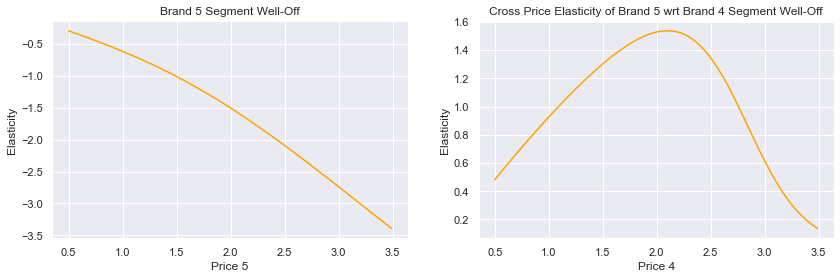

In [77]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

* It is extremely important to note that while the x-axis both show the same price range, the first one refers to changes in the price of brand5. The second one, refers to changes in the price of brand 4. Let me also remind you that the natural domain of prices of brand 5 is from 2.11 to 2.80. So it is worth focussing on this point of the graph.
* First, the own price elasticity indicates that the well-off customer is elastic to our own brand. This was rather expected as they seem to prefer brand 4. And if we check our descriptive analysis table, we can verify that indeed, over 60% of the well-off segment purchased brand 4 and about 20% by brand 5.
* Now the cross price elasticities again, they are positive, indicating that for the well-offs, brand 4 is a substitute for brand 5. Now, there are a number of insights you can derive from this result. We mentioned most of them in the previous lessons, so we won't spend too much time on that. Instead, we will focus on a novel idea basedd on both graphs.
* Let's first highlight the natural domains of the prices of brand 5 and brand 4 on the two graphs. Say brand 5 costs 2, so our own price elasticity is about -2. Moreover, brand 4 cost 2. So, the cross price elasticity is about 1.5. What would happen if our competitor brand 4 lowers its price by 1%? Well, the cross price elasticity is 1.50, so the purchase probability of our brand will fall by 1.5%. Sounds like a serious hit on our sales, but we can strike back. We can lower our own price by 1%. In that case, we must look at the own price elasticity of our brand since it is -2, a 1% decrease in our price would be reflected in a 2% increase in purchase probability. The net effect of the two price decreases is 2%, -.5%, or +0.5%. Therefore, we have reacted to our compititors price range and have actually gained some market share.
* In a similar way, knowing the price elasticities we can react to our competitor to keep the purchase probability constant. We established that if brand 4 decreases their price by 1%, the purchase probability for our brand would decrease by 1.5%. To match that by our own price decrease, we can make an equation x * 2 = 1.5%. In this equation, x is the decrease in price, we require to reach a 1.5% increase in purchase probability. The answer is 1.5% / 2 or 0.75%. Therefore, if brand 4 decreases their price by 1%, we can decrease ours by 0.75%. And theoretically we won't lose a single customer from the well-off segment.

### $\color{blue}{\text{Standard}}$

In [78]:
# Here we are interesting in analysing the brand choice probability of the Standard segment.
# We filter our data, by selecting only purchases from segment 0.
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,0,1,0,0,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,0,1,0,0,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,0,1,0,0,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,0,1,0,0,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,0,1,0,0,0


In [79]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [80]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [81]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### $\color{green}{\text{Career-Focused}}$

In [82]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [83]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [84]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [85]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

### $\color{red}{\text{Fewer-Opportunities}}$

In [86]:
# Filter data, select only purchases from segment 2, which is the Fewer-Opportunities segment.
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [87]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [88]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [89]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844,-0.125732,-0.195632,-0.049055,0.332011,-0.115845,0.174125,-0.043940,0.194775,-0.001036,0.181599,-0.297304,0.482421
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766,-0.129848,-0.201753,-0.050616,0.337287,-0.118884,0.176181,-0.045027,0.197259,-0.001098,0.183896,-0.303350,0.491726
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757,-0.134043,-0.207976,-0.052207,0.342506,-0.121958,0.178186,-0.046123,0.199692,-0.001163,0.186144,-0.309406,0.501015
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820,-0.138318,-0.214303,-0.053827,0.347668,-0.125068,0.180139,-0.047229,0.202074,-0.001231,0.188343,-0.315473,0.510289
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954,-0.142674,-0.220733,-0.055477,0.352773,-0.128213,0.182043,-0.048343,0.204406,-0.001303,0.190494,-0.321551,0.519548
5,0.55,-0.118120,-0.245119,-0.140923,-0.040614,-0.193160,-0.147112,-0.227269,-0.057158,0.357820,-0.131394,0.183896,-0.049468,0.206688,-0.001378,0.192597,-0.327640,0.528790
6,0.56,-0.122858,-0.252237,-0.145586,-0.042853,-0.198438,-0.151632,-0.233910,-0.058871,0.362809,-0.134611,0.185700,-0.050602,0.208921,-0.001458,0.194652,-0.333742,0.538016
7,0.57,-0.127740,-0.259466,-0.150351,-0.045200,-0.203789,-0.156237,-0.240658,-0.060615,0.367740,-0.137866,0.187454,-0.051745,0.211104,-0.001541,0.196659,-0.339855,0.547226
8,0.58,-0.132769,-0.266807,-0.155217,-0.047660,-0.209213,-0.160926,-0.247513,-0.062391,0.372614,-0.141158,0.189160,-0.052899,0.213238,-0.001629,0.198619,-0.345981,0.556420
9,0.59,-0.137947,-0.274261,-0.160187,-0.050236,-0.214711,-0.165702,-0.254476,-0.064200,0.377429,-0.144488,0.190817,-0.054062,0.215324,-0.001722,0.200532,-0.352121,0.565597


Text(0.5, 0, 'Price 4')

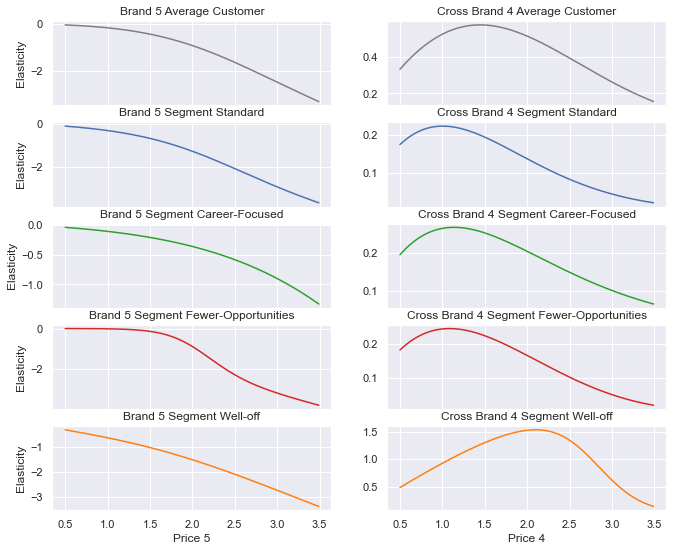

In [90]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

Welcome to the last lecture in brand choice modelling for this course. 
Here we'll analyze the purchase probability for brand five across the four segments. 
We'll use elasticities of the own brand and cross elasticities for a competitor brand.
Let's get to it.
We have the pricing elasticities for the average customer as well As for the each of the segments. 
Calculating them was a part of the homework and I hope you have managed to complete it. 
If not, please refer to our notebook files.
Using similar code to what you've seen, we've plotted own price elasticities and cross price elasticities side by side. 
The first line represents the average customer, while the following lines represent the segments from zero to three.
We chose this representation of the results as it will allow us to easily compare each of the four segments to one another. 
I won't go into details explaining the code, however, you can pause here and examine it at your leisure. 
You can download it from the resources with this lecture.
Great. 
It's time for our brand choice analysis. 
Let's start with the standard segment for which you calculate it elasticities during homework.
Note that the X axis referred to the price of brand 5 and price of Brand 4 respectively. 
the Y axis reflect the own price elasticity or the cross price elasticity.
As you can probably notice, they differ greatly among the different graphs, so we will have to pay special attention to them. 
With that in mind, we can spot that the standard customer is more elastic when compared to the average. 
The difference becomes even more pronounced when we compared the standards to the career focused and well off segment.
In the price range 2.1 to 2.8, the elasticity of the standard segment is between minus 1.42 and minus 2.7. 
Therefore, its purchase probability for the own brand is elastic for the entire observed price range of the brand.
If we were to win some of the standard segment market, our marketing strategy would be to lower prices in this price range to increase the purchase probability for this segment. 
However, remember that this segment isn't homogeneous and a marketing strategy based on only this segment might not be in our best interest.
Let's see how the next segment will fare in this respect. 
It's the career focused.
Straight away we can ascertain that they are the least elastic among the rest. 
They seem to be inelastic throughout the whole price range. 
This is great news for the marketing team as it means that this segment is not really affected by the increase in the price of the own brand. 
In addition, their cross price elasticity also has extremely low values. 
This shows that they are unlikely to switch to the competitor brand. 
Such segments are called loyal to the brand and it may sound ruthless.
But the marketing team could increase prices of our own brand without fear of losing too much market share.
Alright, let's continue with the fewer opportunity segment. 
There elasticity curve seems to differ when compared to the rest of the segments. 
The own price elasticity has a more pronounced shape. 
This segment seems to be inelastic at lower price points and then they rapidly become the most elastic customers at higher prices. 
In fact for the whole natural domain of the brand five prices, they are rather elastic in terms of cross price elasticity is in the same range.
As for the career focused looks as if they are somewhat loyal to brand five when compared to brand four. 
What could be the reason?When we consult our descriptive analysis table, we concur that this segment almost never buys brand 5 or indeed brand 4. 
Less than 1% of their customers have purchased one of these brands. Therefore, we don't have enough observations to obtain an accurate model and that is the reason why both curves look so out of character.
We can conclude that in order for marketing to target this segment in particular, brand five would need to obtain more data of purchases from this segment. 
Sometimes, like here, a product may be too pricey for a segment, so we may never obtain more data about their behaviour. 
These people are simply not the target group.
Based on this observation, it makes sense to actually focus on the descriptors for a bit more. 
It appears that the career focused and well off segments require the most attention, as they are actually the people that purchase brand 5.
All right.
We've already gained some insight about the well off segment in our previous lecture. 
In fact, it seems that the well off segment is much more elastic than the career focused. 
Therefore, if we were to increase our prices, this would barely affect the career focus segment but would seriously damage our well off segment sales.
Now what if brand four were to decrease their price as we hypothesized in our previous lecture? Well that would affect the well off segment as discussed before, but not the career focused one. 
Therefore a tiny decrease in our pricing would compensate such a competitive move. 
This is extremely important to know because if prices of chocolate candy bars were to drop, we would have space to decrease our price offering while gaining solid market share from the well.
Segment and practically retaining our career focused customer base.
Excellent. 
We've completed our brand choice analysis for brand five. 
We saw how to interpret own price and cross price elasticities and use segmentation information to devise a marketing strategy. 
Of course, you can conduct the same analysis for any of the remaining brands. 
For instance, it could be interesting to observe what insight can be gathered by comparing brands one and two. 
A quick hint, it's where the standard and fewer opportunities dominate.
Well, you already have the know how to tackle this task all on your own. 

We'll continue with modelling purchase probability based on purchase quantity. 

## Price Elasticity of Purchase Quantity
    What quantity or how many units of the product category of interest will the customer buy? 
    All the values are integers ranges from 1-15. In terms of predictions, if we get a value of 1.88 for instance, we simply round up to 2.

In [91]:
# We want to determine price elasticity of purchase quantity, also known as price elasticity of demand.
# We are interested in purchase ocassion, where the purchased quantity is different from 0.
# Therefore, once again we filter our data to contain only shopping visits where the client has purchased at least one product.
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [92]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
# Here we make a decission on which features to include in our model. We decide to include a Price and a Promotion feature.
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [94]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [95]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation. Linear Regression

In [96]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [97]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [98]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [99]:
# Linear Regression Model. The coefficients for price and promotion are both negative. 
# It appears that promotion reflects negatively on the purchase quantity of the average client, which is unexpected.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

* For every dollar increase in price, about 0.81 units less chocolates will be bought. Naturally as price increases, purchase quantity decreases. 
* Then if there is promotion, about 0.10 units less will be bought. Interestingly, people would buy a bit less if there is a promotion. This may be explained by the 1. May be some important information is missing in our data. 2. We are considering the average customer and not any particular segment.3. Apromotion is promoting a customer to try out a new brand.

## Price Elasticity with Promotion
    Price Elasticity of purchase quantity is the percentage change in purchase quantity in response to a 1% change in the unit price of the brand chosen, assuming nothing else but the price changes. In economics price elasticity is often associated with price elasticity of demand. What we will explore here is as close as it can get to the theoritical fundament. 

In [100]:
# We examine the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [101]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684993

In [102]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [103]:
# We calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [104]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844,-0.125732,-0.195632,-0.049055,0.332011,-0.115845,0.174125,-0.043940,0.194775,-0.001036,0.181599,-0.297304,0.482421,-0.102157
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766,-0.129848,-0.201753,-0.050616,0.337287,-0.118884,0.176181,-0.045027,0.197259,-0.001098,0.183896,-0.303350,0.491726,-0.104413
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757,-0.134043,-0.207976,-0.052207,0.342506,-0.121958,0.178186,-0.046123,0.199692,-0.001163,0.186144,-0.309406,0.501015,-0.106679
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820,-0.138318,-0.214303,-0.053827,0.347668,-0.125068,0.180139,-0.047229,0.202074,-0.001231,0.188343,-0.315473,0.510289,-0.108954
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954,-0.142674,-0.220733,-0.055477,0.352773,-0.128213,0.182043,-0.048343,0.204406,-0.001303,0.190494,-0.321551,0.519548,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.013986,-5.052573,-5.680864,-12.541399,-4.025377,-4.861280,-4.982895,-3.231571,0.162236,-3.592452,0.024052,-1.287428,0.068591,-3.746081,0.023405,-3.337317,0.157464,-1.774292
296,3.46,-8.039237,-5.069431,-5.701022,-12.578316,-4.040258,-4.879481,-4.999800,-3.247765,0.160336,-3.606356,0.023695,-1.297237,0.067968,-3.757523,0.022946,-3.350648,0.152043,-1.788634
297,3.47,-8.064453,-5.086271,-5.721142,-12.615215,-4.055123,-4.897651,-5.016686,-3.263927,0.158450,-3.620217,0.023344,-1.307101,0.067350,-3.768945,0.022493,-3.363975,0.146787,-1.803124
298,3.48,-8.089635,-5.103092,-5.741227,-12.652099,-4.069971,-4.915792,-5.033552,-3.280056,0.156578,-3.634033,0.022996,-1.317021,0.066735,-3.780347,0.022047,-3.377299,0.141692,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

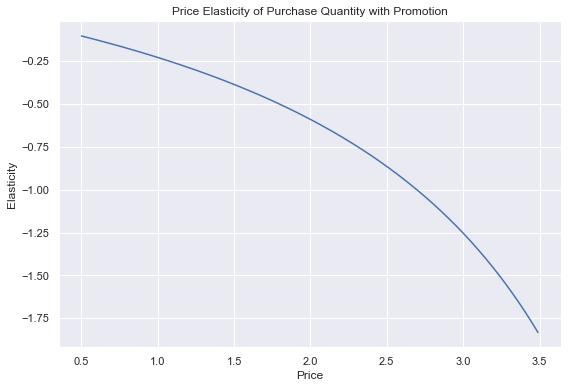

In [105]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

## Price Elasticity without Promotion

In [106]:
# Overwrite promotion incidence in order to use the same df. 
# Here we assume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096463,-0.211180,-0.119064,-0.030883,-0.167844,-0.125732,-0.195632,-0.049055,0.332011,-0.115845,0.174125,-0.043940,0.194775,-0.001036,0.181599,-0.297304,0.482421,-0.102157,-0.099543
1,0.51,-0.100534,-0.217750,-0.123246,-0.032648,-0.172766,-0.129848,-0.201753,-0.050616,0.337287,-0.118884,0.176181,-0.045027,0.197259,-0.001098,0.183896,-0.303350,0.491726,-0.104413,-0.101736
2,0.52,-0.104732,-0.224429,-0.127522,-0.034499,-0.177757,-0.134043,-0.207976,-0.052207,0.342506,-0.121958,0.178186,-0.046123,0.199692,-0.001163,0.186144,-0.309406,0.501015,-0.106679,-0.103939
3,0.53,-0.109060,-0.231216,-0.131892,-0.036442,-0.182820,-0.138318,-0.214303,-0.053827,0.347668,-0.125068,0.180139,-0.047229,0.202074,-0.001231,0.188343,-0.315473,0.510289,-0.108954,-0.106150
4,0.54,-0.113522,-0.238113,-0.136359,-0.038478,-0.187954,-0.142674,-0.220733,-0.055477,0.352773,-0.128213,0.182043,-0.048343,0.204406,-0.001303,0.190494,-0.321551,0.519548,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.013986,-5.052573,-5.680864,-12.541399,-4.025377,-4.861280,-4.982895,-3.231571,0.162236,-3.592452,0.024052,-1.287428,0.068591,-3.746081,0.023405,-3.337317,0.157464,-1.774292,-1.664290
296,3.46,-8.039237,-5.069431,-5.701022,-12.578316,-4.040258,-4.879481,-4.999800,-3.247765,0.160336,-3.606356,0.023695,-1.297237,0.067968,-3.757523,0.022946,-3.350648,0.152043,-1.788634,-1.677205
297,3.47,-8.064453,-5.086271,-5.721142,-12.615215,-4.055123,-4.897651,-5.016686,-3.263927,0.158450,-3.620217,0.023344,-1.307101,0.067350,-3.768945,0.022493,-3.363975,0.146787,-1.803124,-1.690246
298,3.48,-8.089635,-5.103092,-5.741227,-12.652099,-4.069971,-4.915792,-5.033552,-3.280056,0.156578,-3.634033,0.022996,-1.317021,0.066735,-3.780347,0.022047,-3.377299,0.141692,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

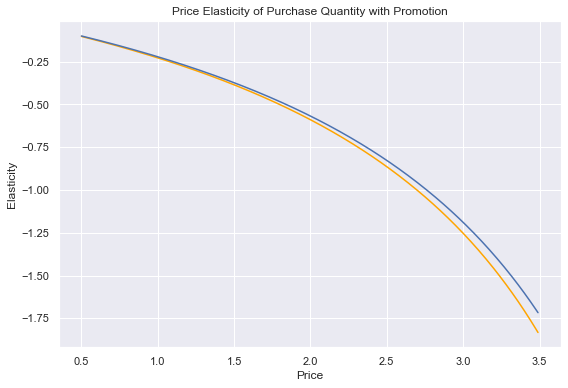

In [107]:
# Plot the two elasticities side by side. 
# We observe that the two elasticities are very close together for almost the entire price range.
# It appears that promotion does not appear to be a significant factor in the customers' decission 
# what quantity of chocolate candy bars to purchase.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

* What we can see is thet customers are a tiny bit more elastic when there is a promotion. However, overall customers are inelastic towards purchase quantity for all prices from 0.5 to 2.7. As you remember, our most expensive brand costs 2.80 atmost. Furthermore, promotion doesn't look like such a big factor either. The two lines practically overlap at many of the price points. The reason might be that the variables we included in our model hold no predictive value. Therefore, it might seem like it doesn't really make sense to focus too much on the purchase quantity. Neither price nor promotion shifts appear to affect the customer's decision. A different explanation could be that our methodology is imperfect. The main concern here is that we are estimating a model based on the average customer and we already know that there are 4 distinct and quite different segments. Maybe we could refine our model further to amend that. One idea is to calculate price elasticity of demand for each brand. You can just filter all transactions reating to brand 5 for instance, and explore the price elasticity of purchase quantity for brand 5.